In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Descriptive Analysis

In [2]:
# Load Data
nodes_df = pd.read_csv("/kaggle/input/twitch/Twitch_nodes.csv")  # Adjust path if needed
edges_df = pd.read_csv("/kaggle/input/twitch-edges/Twitch_edges_2.csv")
print(nodes_df.shape)
edges_df.shape


(7126, 6)


(35324, 2)

In [3]:
nodes_df.dropna(inplace=True)
edges_df.dropna(inplace=True)
print("After Dropping Null Values")
print(nodes_df.shape)
edges_df.shape


After Dropping Null Values
(7126, 6)


(35324, 2)

In [4]:
# EDA: Check for missing values
print("Missing values in nodes:")
print(nodes_df.isnull().sum())
print("\nMissing values in edges:")
edges_df.isnull().sum()

Missing values in nodes:
ID                0
Days_active       0
Mature_content    0
Views             0
Affiliate         0
Channel_ID        0
dtype: int64

Missing values in edges:


Source    0
Target    0
dtype: int64

In [5]:
# Display dataset info
print("Nodes Dataset Info:")
print(nodes_df.info())
print("\n---------\n")
edges_df.info()

Nodes Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7126 entries, 0 to 7125
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              7126 non-null   int64
 1   Days_active     7126 non-null   int64
 2   Mature_content  7126 non-null   bool 
 3   Views           7126 non-null   int64
 4   Affiliate       7126 non-null   bool 
 5   Channel_ID      7126 non-null   int64
dtypes: bool(2), int64(4)
memory usage: 236.7 KB
None

---------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35324 entries, 0 to 35323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Source  35324 non-null  int64
 1   Target  35324 non-null  int64
dtypes: int64(2)
memory usage: 552.1 KB


In [6]:
nodes_df.describe()

,ID,Days_active,Views,Channel_ID
count,7126.000000,7126.000000,7.126000e+03,7.126000e+03
mean,3562.500000,1525.222004,1.934702e+05,7.991650e+07
std,2057.243342,706.688380,2.968965e+06,4.732056e+07
min,0.000000,84.000000,5.000000e+00,1.266500e+04
25%,1781.250000,980.000000,1.743000e+03,4.151841e+07
50%,3562.500000,1536.000000,4.839500e+03,6.682796e+07
75%,5343.750000,2023.000000,1.526300e+04,1.143396e+08
max,7125.000000,4161.000000,1.785005e+08,2.155803e+08


In [7]:
edges_df.describe()

,Source,Target
count,35324.000000,35324.000000
mean,2532.502152,4479.915836
std,1806.583568,1756.014934
min,0.000000,1.000000
25%,1007.750000,3160.000000
50%,2212.000000,4767.000000
75%,3819.000000,5934.000000
max,7125.000000,7125.000000


In [8]:
nodes_df.head()

,ID,Days_active,Mature_content,Views,Affiliate,Channel_ID
0,2299,1459,False,9528,False,73045350
1,153,1629,True,3615,False,61573865
2,397,411,True,46546,False,171688860
3,5623,953,True,5863,False,117338954
4,5875,741,True,5594,False,135804217


In [9]:
edges_df.head()

,Source,Target
0,6194,255
1,6194,980
2,6194,2992
3,6194,2507
4,6194,986


## EDA

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


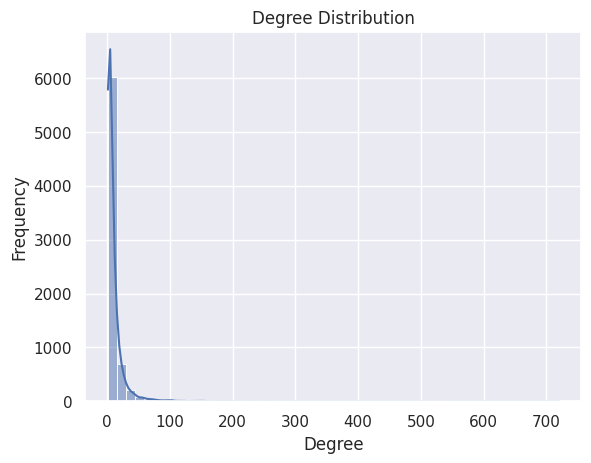

In [10]:
# Visualize node degree distribution
sns.set()
degree_counts = edges_df.stack().value_counts()
sns.histplot(degree_counts, bins=50, kde=True)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

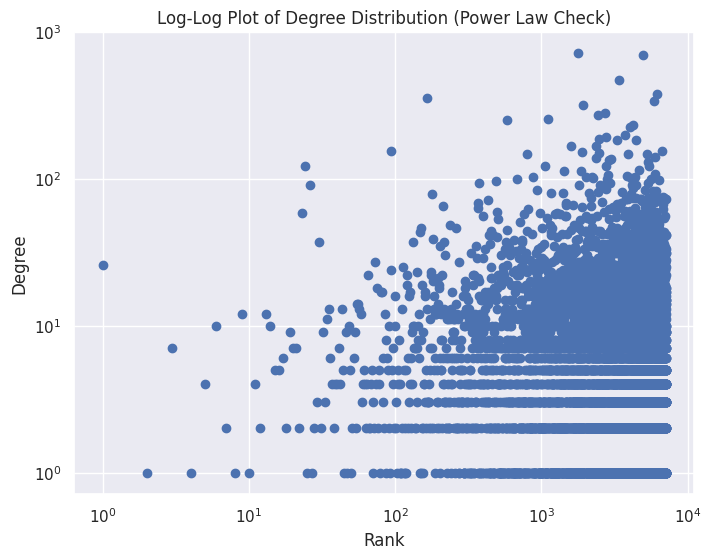

In [11]:
# Log-Log Plot for Power Law Distribution
plt.figure(figsize=(8,6))
plt.loglog(degree_counts, marker="o", linestyle="none")
plt.title("Log-Log Plot of Degree Distribution (Power Law Check)")
plt.xlabel("Rank")
plt.ylabel("Degree")
plt.grid(True)
plt.show()

## Network Analysis

In [12]:
# Create a Directed Graph
graph = nx.DiGraph()
graph.add_edges_from(edges_df.values)

In [13]:
# Create a Directed Graph
graph = nx.DiGraph()
graph.add_edges_from(edges_df.values)

## Computing Desired Matrices

In [14]:
# Compute Centrality Metrics
betweenness = nx.betweenness_centrality(graph, normalized=True)

in_degree = dict(graph.in_degree())  # Degree centrality in directed graph

In [15]:
eigenvector = nx.eigenvector_centrality(graph, max_iter=2000, tol=1e-06)

In [16]:
# Convert to DataFrame
centrality_df = pd.DataFrame({
    "ID": list(graph.nodes),
    "Betweenness_Centrality": [betweenness[node] for node in graph.nodes],
    "Eigenvector_Centrality": [eigenvector[node] for node in graph.nodes],
    "In_Degree_Centrality": [in_degree[node] for node in graph.nodes]
})

In [17]:
# Merge with Twitch data
centrality_df = centrality_df.merge(nodes_df, on="ID", how="left")

In [18]:
# Get Top 10 for each metric
top_betweenness = centrality_df.nlargest(10, "Betweenness_Centrality")
top_eigenvector = centrality_df.nlargest(10, "Eigenvector_Centrality")
top_degree = centrality_df.nlargest(10, "In_Degree_Centrality")


In [19]:
top_degree.head()
top_betweenness.head()
top_eigenvector.head()

,ID,Betweenness_Centrality,Eigenvector_Centrality,In_Degree_Centrality,Days_active,Mature_content,Views,Affiliate,Channel_ID
4227,7065,0.0,0.718703,41,278,False,2926,False,189024918
4013,7107,0.0,0.295240,16,1163,False,226865,False,98385887
3504,7122,0.0,0.289491,9,1001,True,187417,False,112754680
2899,2674,0.0,0.289491,6,878,False,9177,False,124336451
2739,7070,0.0,0.252606,10,1940,True,22560,False,45006736


In [20]:
# Save results
top_betweenness.to_csv("top_betweenness.csv", index=False)
top_eigenvector.to_csv("top_eigenvector.csv", index=False)
top_degree.to_csv("top_degree.csv", index=False)

In [21]:
# Find intersection of top 10 across all three metrics
intersection_all = set(top_betweenness["ID"]) & set(top_eigenvector["ID"]) & set(top_degree["ID"])
top_common_all = centrality_df[centrality_df["ID"].isin(intersection_all)]

In [22]:
# Find intersection in any two metrics
intersection_any_two = (set(top_betweenness["ID"]) & set(top_eigenvector["ID"])) | \
                        (set(top_betweenness["ID"]) & set(top_degree["ID"])) | \
                        (set(top_eigenvector["ID"]) & set(top_degree["ID"]))
top_common_any_two = centrality_df[centrality_df["ID"].isin(intersection_any_two)]

In [23]:
# Save intersection results
top_common_all.to_csv("top_common_influencers_all.csv", index=False)
top_common_any_two.to_csv("top_common_influencers_any_two.csv", index=False)


In [24]:
print("Top Common Influencers in All Three Metrics:")
top_common_all.head()

Top Common Influencers in All Three Metrics:


,ID,Betweenness_Centrality,Eigenvector_Centrality,In_Degree_Centrality,Days_active,Mature_content,Views,Affiliate,Channel_ID


In [25]:
# Print final results
print("\nTop Common Influencers in Any Two Metrics:")
top_common_any_two.head()


Top Common Influencers in Any Two Metrics:


,ID,Betweenness_Centrality,Eigenvector_Centrality,In_Degree_Centrality,Days_active,Mature_content,Views,Affiliate,Channel_ID
14,3401,0.011533,7.919932e-24,208,2959,True,20253246,True,15310631
21,5842,0.004229,1.442018e-06,278,3556,False,7448777,True,3481156
54,1773,0.014491,1.031396e-42,180,2784,False,89506813,True,20786541
88,4949,0.016927,4.313402e-13,465,2632,False,46682923,True,23735582
143,6136,0.007060,1.836984e-29,153,2443,False,178500544,True,27942990


## Compairing Influener with User

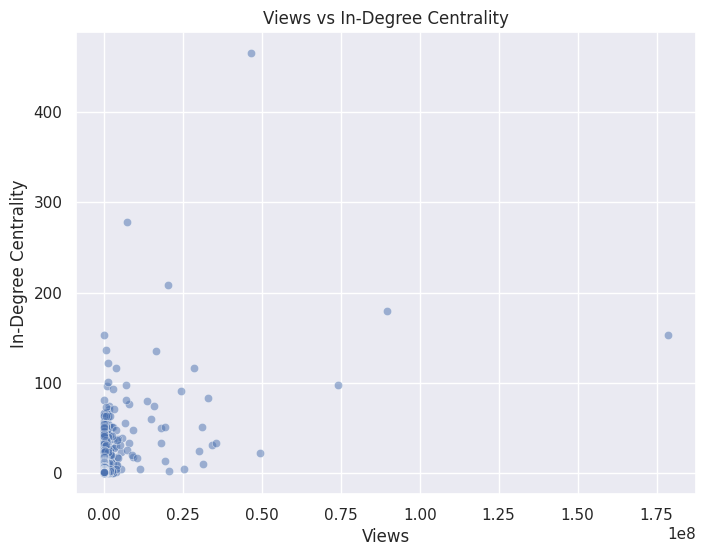

In [26]:
# Compare with Views and Other Metrics
comparison_cols = ["Views", "Followers", "Partnered"]  # Adjust based on dataset columns
for col in comparison_cols:
    if col in nodes_df.columns:
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=centrality_df, x=col, y="In_Degree_Centrality", alpha=0.5)
        plt.title(f"{col} vs In-Degree Centrality")
        plt.xlabel(col)
        plt.ylabel("In-Degree Centrality")
        plt.show()

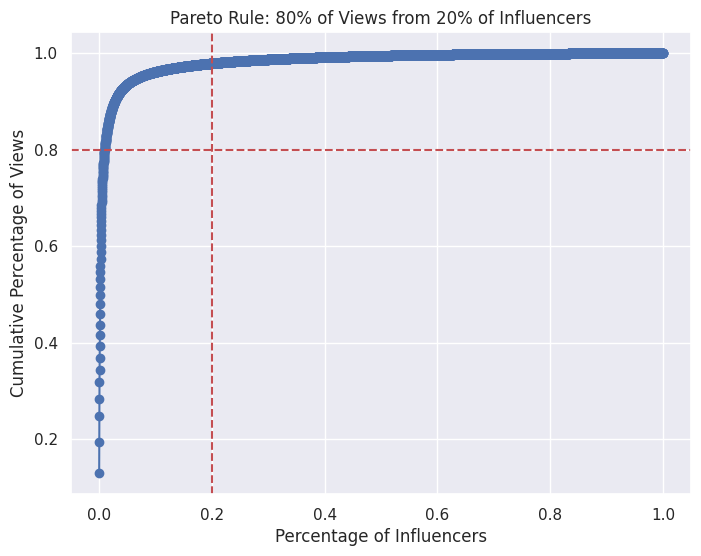

In [27]:
# Power Law Check (Pareto Rule: 80/20 Distribution)
nodes_df_sorted = nodes_df.sort_values(by="Views", ascending=False)
nodes_df_sorted["Cumulative_Views"] = nodes_df_sorted["Views"].cumsum()
total_views = nodes_df_sorted["Views"].sum()
nodes_df_sorted["Cumulative_Percentage"] = nodes_df_sorted["Cumulative_Views"] / total_views

plt.figure(figsize=(8,6))
plt.plot(np.arange(len(nodes_df_sorted)) / len(nodes_df_sorted), nodes_df_sorted["Cumulative_Percentage"], marker="o")
plt.axhline(y=0.8, color='r', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='--')
plt.title("Pareto Rule: 80% of Views from 20% of Influencers")
plt.xlabel("Percentage of Influencers")
plt.ylabel("Cumulative Percentage of Views")
plt.grid(True)
plt.show()